# Machine Learning

***

```sh
$ conda install tensorflow
```


https://keras.io/

## Packages

***

In [1]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Neural networks.
import tensorflow.keras as keras

In [2]:
# Horrible hack from: https://stackoverflow.com/a/53014308
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## Single Neuron

***

![Neuron](img/neuron.svg)

## Single Input

***

![Single Input Neuron](img/neuron-single-input.svg)

$$y = mx + c$$

$$ \phi (x) = x $$

$$ \phi (w_1 x_1 + w_0 (1)) = w_1  x_1 + w_0 $$

In [3]:
# Identity activation function.
def identity(x):
    return x

In [4]:
# Firing a neuron.
def fire_neuron(x, w, phi):
    return phi(np.sum(x * w))

In [5]:
# Our x values - always has to have 1.0 at index 0.
x = np.array([1.0, 4.0])

# Our weights.
w = np.array([2.0, 3.0])

x, w

(array([1., 4.]), array([2., 3.]))

In [6]:
fire_neuron(x, w, identity)

14.0

## Data

***

In [7]:
# Real-world input values.
data_in = np.arange(1.0, 13.0, 1.0)

data_in

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [8]:
# Real-world output values.
data_out = 4.0 * data_in + np.random.normal(0.0, 1.0, len(data_in))

data_out

array([ 3.46702859,  8.33830859, 10.60807612, 15.45659455, 19.46354356,
       25.42139552, 27.5433041 , 31.17257971, 34.38707312, 41.58346448,
       43.96000677, 48.33973443])

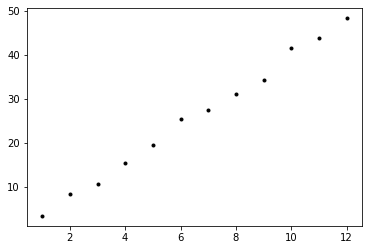

In [9]:
plt.plot(data_in, data_out, 'k.');

## Training

***

In [10]:
# An index in the data set.
i = 5

In [11]:
# Actual input/output pair from the real world.
data_in[i], data_out[i]

(6.0, 25.421395520603408)

In [12]:
# Initial weights.
w =  np.array([0.0, 1.0])

# What the neuron currently outputs for the real-world input, based on current weights.
fire_neuron(np.array([1.0, data_in[i]]), w, identity)

6.0

In [13]:
# The goal is to create an algorithm that updates w to move the output towards the real output.
# Initial weights.
w =  np.array([0.0, 4.0])

# What the neuron could output for the real-world input, based on better weights.
fire_neuron(np.array([1.0, data_in[i]]), w, identity)

24.0

## Cost

***

In [14]:
# Usually use sum of squares.
def cost(w, x, phi, y):
    pred = fire_neuron(x, w, phi)
    return (y - pred)**2

In [15]:
# An index in the data set.
i = 5

In [16]:
# Cost of initial w.
w = np.array([0.0, 1.0])

cost(w, data_in[i], identity, data_out[i])

377.19060396771414

In [17]:
# Cost of a "better" w.
w = np.array([0.0, 4.0])

cost(w, data_in[i], identity, data_out[i])

2.020365225991433

## Training

***

In [18]:
# Hyperparameter.
learning_rate = 0.001

In [19]:
def train_neuron(x, y, w, phi):
    # The possible adjustment to the weights.
    adjust = np.array([0.0, learning_rate])
    # Calculate the current cost.
    current = cost(w, x, phi, y)
    # Calculate the cost with slight adjustment to the weights.
    adding = cost(w + adjust, x, phi, y)
    # If the adjusted weights lower the cost, update the weights.
    if adding < current:
        w = w + adjust
    # Otherwise move in the other direction.
    else:
        w = w - adjust
    return w

In [20]:
# Set some initial weights.
w = np.array([0.0, 1.0])

In [21]:
# The training values.
data_in[i], data_out[i]

(6.0, 25.421395520603408)

In [22]:
# Current neuron output for data_in[i].
fire_neuron(np.array([1.0, data_in[i]]), w, identity)

6.0

In [23]:
# Nudge the weights towards better values.
w_improved = train_neuron(data_in[i], data_out[i], w, identity)
w_improved

array([0.   , 1.001])

In [24]:
# Current neuron output for data_in[i].
fire_neuron(np.array([1.0, data_in[i]]), w_improved, identity)

6.005999999999999

In [25]:
# Set some initial weights.
w = np.array([0.0, 1.0])

# Loop several times.
for epoch in range(10000):
    for i in range(len(data_in)):
        w = train_neuron(data_in[i], data_out[i], w, identity)

# Show w.
w

array([0.   , 3.898])

## Using keras

***

https://github.com/keras-team/keras

In [ ]:
# run through the steps with a nonesense dataset

In [ ]:
# Importing keras (already installed above) - ERROR IF INSTALLED MORE THAN ONCE IN THE KERNEL
# import tensorflow.keras as keras

In [26]:
# Create a new sequential neural network.
# sequentilal means designing by sequentially add neurons in layers
model = keras.Sequential()

In [27]:
# Add a dense layer with 64 neurons and use the relu activation function.
# copied from github.com/keras-team/keras
# add to model above
# use dense.layer 
# 64 neurons will be calculated before the 10 neurons in the 2nd later below
model.add(keras.layers.Dense(units=64, activation='relu'))

In [28]:
# Add a dense layer with 10 neurons and the softmax activation function.
# dense: every single of 10 neurons in 2nd layer will get an input from each of the 64 neurons in layer before it
# 640 conenctions each with their own weight 
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [29]:
# Compile the neural network.
# loss categorical crossentropy ?
# stacastic gradient descent - looks for local minimum
# loss is synonym for cost (cost function)
# keep an eye on metrics
# compile - make that into a nice package- i.e. build the graph in tensorflow
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [30]:
# Create a fake training data set.
# x and y are not related here
# needs 54 input data points
# output should be 10 data points
x_train = np.random.normal(0.0, 1.0, (100, 64))# 64 values coming in 100 times for the (input) X values
y_train = np.random.normal(0.5, 0.1, (100, 10))# 10 values coming out 100 times for the (output) Y values

In [31]:
# Train the neural network.
# we dont have x-train and y_train yet
# epoch = number of times the data passes through the graph
# batch size = take the data in batches of 32 and process them
# last batch might be  <32
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
4/4 [==============================] - 1s 10ms/step - loss: 13.6614 - accuracy: 0.0700
Epoch 2/5
4/4 [==============================] - 0s 6ms/step - loss: 13.5612 - accuracy: 0.0600
Epoch 3/5
4/4 [==============================] - 0s 4ms/step - loss: 13.4862 - accuracy: 0.0600
Epoch 4/5
4/4 [==============================] - 0s 4ms/step - loss: 13.4149 - accuracy: 0.0700
Epoch 5/5
4/4 [==============================] - 0s 4ms/step - loss: 13.3549 - accuracy: 0.0800


In [32]:
# Create a fake training data set.
# needs 64 input data points
# output should be 10 data points
# run just 10 this time
x_test = np.random.normal(0.0, 1.0, (10, 64))
y_test = np.random.normal(0.5, 0.1, (10, 10))

In [33]:
# Evaluate the network.
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)

1/1 [==============================] - 0s 224ms/step - loss: 13.1908 - accuracy: 0.0000e+00


In [34]:
# Make predictions for the test set.
classes = model.predict(x_test, batch_size=128)

1/1 [==============================] - 0s 112ms/step


In [35]:
classes

array([[0.04205546, 0.18232596, 0.136891  , 0.05516278, 0.04216231,
        0.06880058, 0.28208396, 0.04567269, 0.08780894, 0.05703642],
       [0.07855766, 0.23486555, 0.10979262, 0.0617239 , 0.03282955,
        0.05710478, 0.16714974, 0.0256877 , 0.1989627 , 0.0333258 ],
       [0.03315355, 0.22543176, 0.20818514, 0.12291997, 0.06295191,
        0.07081075, 0.0480096 , 0.18077868, 0.01836228, 0.02939632],
       [0.08489962, 0.5251574 , 0.05732492, 0.02014747, 0.07293889,
        0.09561358, 0.02497299, 0.0224053 , 0.02459656, 0.07194329],
       [0.15092503, 0.06605477, 0.14842781, 0.13642627, 0.21531688,
        0.07773596, 0.11308648, 0.03398268, 0.01294088, 0.04510319],
       [0.01441647, 0.51548153, 0.05162987, 0.01805151, 0.08649196,
        0.03988729, 0.10834222, 0.02981665, 0.09025193, 0.04563055],
       [0.19337831, 0.07845178, 0.10070089, 0.1167047 , 0.15109164,
        0.1417489 , 0.03572762, 0.12729178, 0.01869179, 0.03621258],
       [0.16684444, 0.13085634, 0.1576865

## Single Neuron in keras

***

In [36]:
#CREATE A NEW MODEL AGAIN- SINGLE LAYER- ONE NEURON- NO ACTIVATION FUNCTION
# Create a new sequential neural network.
model = keras.Sequential()

In [37]:
# Add a dense layer with 1 neuron and the identity activation function.
model.add(keras.layers.Dense(units=1))

In [38]:
# Compile the neural network.
# loss function: keras loss functions - keras activation functions- google these
# provides loads of types of loss funvtions
# e.g. mean squared error function- computes the mean squared errors between labrls and predictions
# loss takes diff of true and predicted y values squared
# could square root but not needed
# other: categorical CrossEntropy
# jiggle the network to get closer to weight values that minimise the cost/loss
#single layer-single neuron- has a bias

model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [39]:
# Real-world input values.
# copy and paste data in and data out from above
# change the parameter to get hundreds of values
# range 1-13 in iterations of 0.01
data_in = np.arange(1.0, 13.0, 0.01)

# change shape
# different between 1d array in numpy and keras
# keras wants to supply it each value as a 2d array- one element in each row
# errors like this happen all the time in Keras
# difficulty is hard to get NN to work at all
# 1/2 battle is to get it working at all
# don't give up
# even if fixed might get garbage out
# https://stackoverflow.com/a/47468541
data_in = data_in.reshape(-1, 1)

data_in

array([[ 1.  ],
       [ 1.01],
       [ 1.02],
       ...,
       [12.97],
       [12.98],
       [12.99]])

In [40]:
# Real-world output values.
# generate the y = mx +C
# hope the keras model has learned the relationship between x * y (multiply the input x 4)
# in NN will never be able to pull out all the weights from the model
# i.e. 640 different weights 64 individual bias
# in real will have so many weights that have tiny nudges to the answer
# not possible to unwind and understand relevance of each one
data_out = 4.0 * data_in + np.random.normal(0.0, 1.0, data_in.shape)

data_out

array([[ 2.78685948],
       [ 5.04360287],
       [ 4.3908048 ],
       ...,
       [53.3417018 ],
       [49.75070392],
       [52.20468426]])

In [41]:
# Train the neural network.
model.fit(data_in, data_out, epochs=5, batch_size=32)

Epoch 1/5
38/38 [==============================] - 0s 2ms/step - loss: 26.5928 - accuracy: 0.0000e+00
Epoch 2/5
38/38 [==============================] - 0s 2ms/step - loss: 1.0806 - accuracy: 0.0000e+00
Epoch 3/5
38/38 [==============================] - 0s 2ms/step - loss: 1.0625 - accuracy: 0.0000e+00
Epoch 4/5
38/38 [==============================] - 0s 2ms/step - loss: 1.0534 - accuracy: 0.0000e+00
Epoch 5/5
38/38 [==============================] - 0s 2ms/step - loss: 1.0154 - accuracy: 0.0000e+00


In [42]:
# Test input values.

# 1001 values
# reshape array
# run throigh the network
# values between -10 and + 20 (blue line in plot below)
data_test = np.linspace(-10.0, 20.0, 1001).reshape(-1, 1)

# Feed test values into neural network.
# preds = predicted values
# model is the keras model
preds = model.predict(data_test)

32/32 [==============================] - 0s 2ms/step


In [43]:
# flatten back to 1d array
# could have included reshape in the function
data_test.flatten()[0]

-10.0

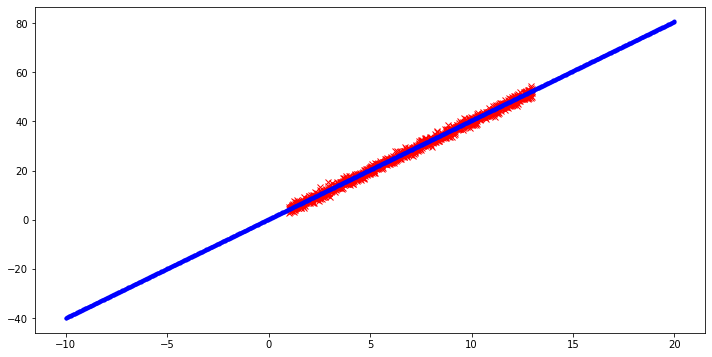

In [44]:
# Plot the values. (12*6 plot)
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the original data set. (red x )
ax.plot(data_in.flatten(), data_out.flatten(), 'rx', label='Training')
 
# Plot the predicted data set. (blue dots)
ax.plot(data_test.flatten(), preds.flatten(), 'b.', label='Predictions');

# single neuron NN has learned the relationship betwwen x and Y
# can now do predictions on that
# keras can do this easy -declare sequential NN
# use loss function using  mean-squared error
# dont tell the neuron how we get from X to Y

***

## End